![image.png](https://i.imgur.com/1WaY7aA.png)

---



---




# Data Science and AI
## Lab 10.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [1]:
# insert code here
## Import libraries
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_diabetes
from sklearn.metrics import confusion_matrix, r2_score
from sklearn.model_selection import train_test_split

# import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.


### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [2]:
# insert code here
diabetes = load_diabetes()

In [3]:
print (diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

### Prepare input data

In [4]:
# insert code here
X = diabetes.data
n_cols = X.shape[1]

y = diabetes.target

### Split the data (training/test)

In [5]:
# insert code here
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.3, random_state = 1)

### Create the model's architecture

In [6]:
# insert code here
model = Sequential()


In [7]:
# Add the input layer
model.add(Dense(n_cols, activation = 'relu', input_shape = (n_cols, )))

# Add the hidden layers
model.add(Dense(100, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))

# Add the output layer
model.add(Dense(1, activation = 'linear'))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 6,311
Trainable params: 6,311
Non-trainable params: 0
_________________________________________________________________
None


### Compile the model

In [9]:
# insert code here
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

### Fit the training data

In [10]:
%%time
# insert code here
model.fit(X_train, y_train, validation_split = 0.25, batch_size = 20, epochs = 200, verbose = 0)


Instructions for updating:
Use tf.cast instead.
Wall time: 4.11 s


In [11]:
#model.history.history

#val_loss
#val_mean_squared_error
#loss
#mean_squared_error


### Create predictions

In [12]:
# insert code here
predictions = model.predict(X_test)


### Evaluate the model

In [13]:
# insert code here
score = model.evaluate(X_test, y_test, batch_size = 20)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))


133/133 [==============================] - 0s 53us/step

Test loss: 2969.121628, Test accuracy: 2969.121628


### Visualisation of cost

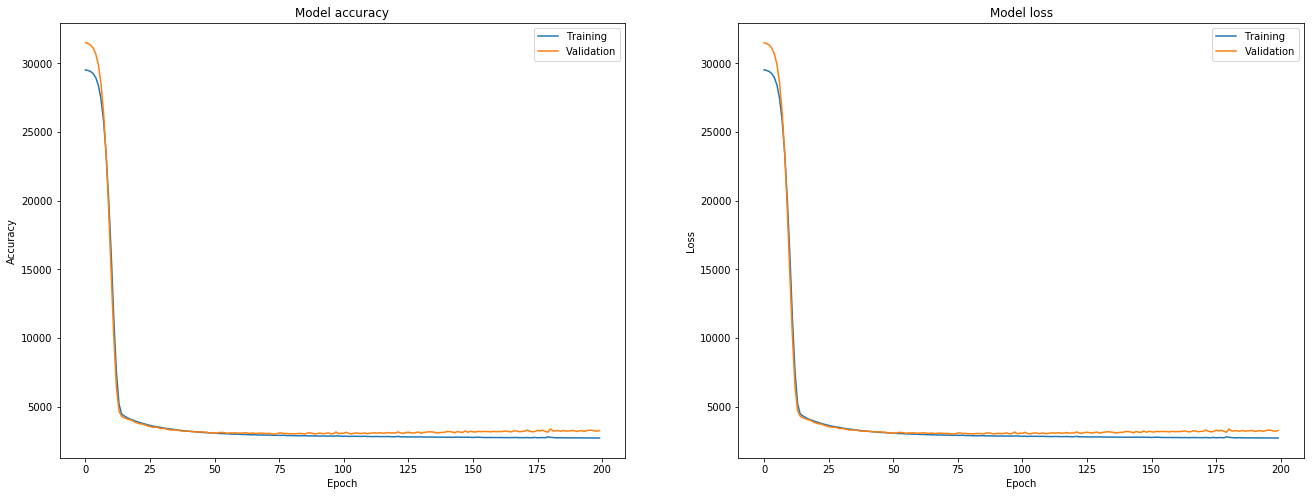

In [14]:
# insert code here
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
#val_loss
#val_mean_squared_error
#loss
#mean_squared_error


# Plot training & validation accuracy values
ax[0].plot(model.history.history['mean_squared_error'], label = 'Training')
ax[0].plot(model.history.history['val_mean_squared_error'], label = 'Validation')
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,5000)
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(model.history.history['loss'], label = 'Training')
ax[1].plot(model.history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0,5000)
ax[1].legend()

plt.show()

### Visualisation of residuals

In [15]:
d = {'actual': y_test, 'predicted': predictions[:,0],'y': y_test}
data = pd.DataFrame(data=d)
data.head()

,actual,predicted,y
0,78.0,97.811295,78.0
1,152.0,102.722931,152.0
2,200.0,183.156693,200.0
3,59.0,78.869804,59.0
4,311.0,171.403000,311.0


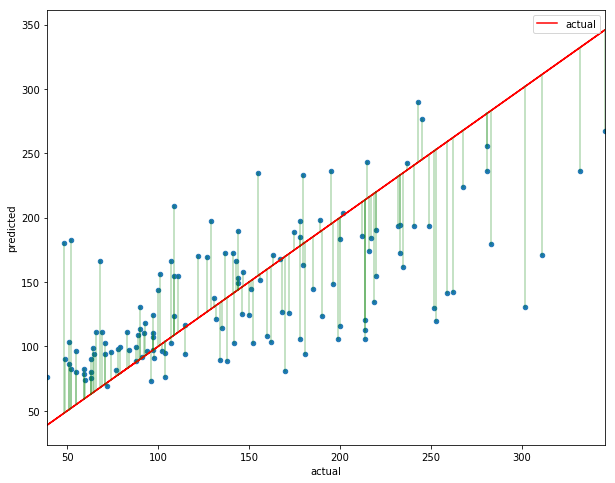

In [16]:
# insert code here
ax = data.plot(kind='scatter',x='actual',y='predicted',figsize=(10,8));
data.plot.line(x='actual', y='y',color='red',ax=ax, label='actual');

# iterate over predictions
for _, row in data.iterrows():
    plt.plot((row['actual'], row['actual']), (row['actual'], row['predicted']), 'g-', alpha=0.3)
plt.show()



In [17]:
r2 = r2_score(y_test, predictions)
n, p = X.shape # sample size, number of explanatory variables
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

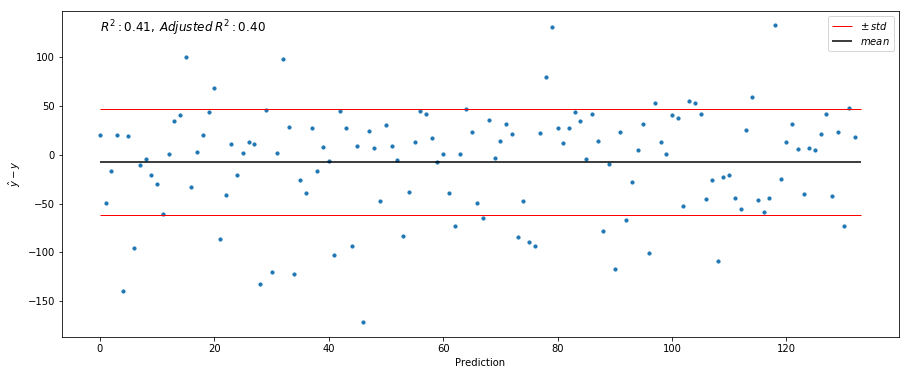

In [18]:
difference = predictions.flatten() - y_test
d_mean = difference.mean()
d_std = difference.std()
num_pred = len(predictions)

plt.figure(figsize = (15, 6))
plt.scatter(range(num_pred), difference, s = 10)
plt.hlines(d_mean + d_std, 0, num_pred, 'r', lw = 1, label = '$\pm \: std$')
plt.hlines(d_mean, 0, num_pred, label = '$mean$')
plt.hlines(d_mean - d_std, 0, num_pred, 'r', lw = 1)
plt.xlabel('Prediction')
plt.ylabel('$\hat y - y$')
plt.legend()
plt.text(0, difference.max() * 0.95,
         '$R^2: %.2f, \: Adjusted \: R^2: %.2f$' % (r2, adjusted_r2),
         fontsize = 12)
plt.show()

>

>

>



---



---



> > > > > > > > > © 2019 Data Science Institute of Australia


---



---



